## Customer Churn Prediction using Logistic Regression##

In this notebook, we will be using a data set for a telecommunication company and predict when its customers will leave for a competitor. This is to help the company to prepare a strategy to retain their customers.

One may question why Logistic Regression is preferred over  Linear Regression, and that is because the former is useful when estimating continuous values such as housing prices. Logistic Regression is used when there is no observed data point that the model trains on but rather tries to identify the most probable class for that data point.

I would like to much appreciation and credit to IBM Data Science Professional Certificate and staff for providing this dataset and the learning opportunity.


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data Understanding ###

It is a known understanding that it is less expensive to keep customers than acquiring new ones, so the focus is to decrease turnover of the customer base. 

Based on the data frame loaded, we see that each row represents a customer record. The last column, 'churn', identifies which customers left within the last month. Other columns identify customer information, services they signed up, and demographic information.

### Data Pre-Processing and Selection ###

As you may already know, it is always better to use more correlated and related data for Machine Learning; moreover, we should also convert the target value(churn) into integers. 

It is also imperative for you to check the size of your dataframe

In [10]:
churn_df=churn_df[['age','tenure','address','income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
churn_df.head()

,age,tenure,address,income,ed,employ,equip,callcard,wireless,churn
0,33.0,11.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,30.0,23.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,35.0,38.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,35.0,7.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [11]:
churn_df.shape

(200, 10)

We will now define the X and y for our dataset.

In [12]:
X=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [13]:
y=np.asarray(churn_df[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

As part of the preprocessing stage, we need to normalize the data in the dataset. We will be normalizing the X data since those are the data points we will be using for this prediction.

In [14]:
from sklearn import preprocessing

X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Splitting to Train/Test Dataset ##

We will now be splitting our data set into train/test sets with a 80/20 breakdown

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (160, 7) (160, 1)
Test set: (40, 7) (40, 1)


One of the mistakes we would like to avoid is over fitting models; hence we use regularization to avoid overfitting and aim to get more accurate predictions.

If we have lots of parameters, but less amount of data, then the model might cause overfitting because the model would try to adapt to all parameters perfectly. But unfortunately, this might not be the case when you feed new data into the model.

* Liblinear was used because it performs well with small dataset
* C indicates the inverse of the regularization strength




In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\t7944MH\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

It is now time to predict using our test set;

In [18]:
yhat=LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

Using predict_proba, we will gather estimates for all classes, ordered by the labels. 

In [19]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

### Evaluation ###

#### Jaccard Index  ####

The Jaccard Similarity (coefficient) basically measures the similarities between sets.It is the size of the intersection divided by the size of the union of two label sets. The accuracy increases as it gets closer to 1.

In [20]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test,yhat)

C:\Users\t7944MH\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

#### Confusion Matrix ####
Another way of looking at accuracy of classifier is using a confusion matrix. This could be a more difficult matrix to visually understand when presenting; however it is worthwhile looking at.

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [66]:
## we will now write the functions that will print and plot the confusion matrix. 

def plot_confusion_matrix(cm,classes, normalize=False,title='Confusion Matrix', cmap=plt.cm.Reds):

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print ('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
    
    

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


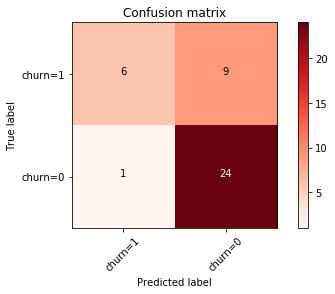

In [68]:
#computing

cnf_matrix=confusion_matrix(y_test,yhat,labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['churn=1','churn=0'],normalize=False, title='Confusion matrix')

The first row is set for churn value 1, which depics customers that actually left the company. There are about 40 customers in this matrix, and 15 of them left the company. Out of the 15 customers with churn value 1, 6 of the was correctly predicted, 9 of them were not.

For the second row, 25 people out of 40 stayed with the company with churn value set to 0. Out of the 25 people, 1 of them was incorrectly predicted while 24 of them predicted correctly.

In [34]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



**Precision Score:** is the measure of the accuracy; it is predicted by TP/(TP+FP)
**Recall:** is a true positive rate. TP/(TP+FN)
**F1 Score:** the harmonic average of precision and recall where the best score is when it reaches 1 and worst is at 0.

We can now tell the average accuracy, which is 0.72

#### Logarithmic Loss ####

A perfect model would have a log loss of 0, closer it is to zero, the better your model is performing. Log Loss takes into account the uncertainty of our prediction based on how much it varies from the actual. 

In [35]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.6017092478101187

## Conclusion ##

We now have a predictive modelling using Logistic Regression to predict customer churn with 75% accuracy rate. 30 out of 40 customers were actually predicted correctly using this model.

If you are like me and found the confusion matrix pretty cool,you can visit the link below to learn more about it.
https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html